[*********************100%***********************]  1 of 1 completed


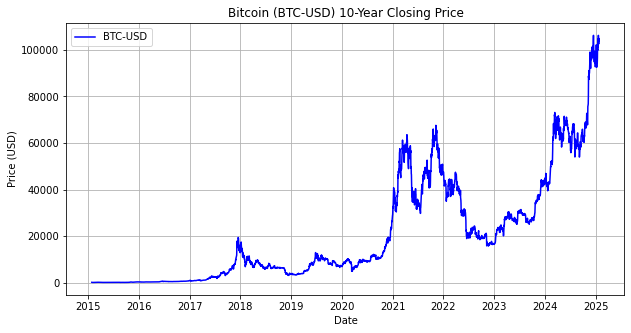

In [1]:
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt

# Downloading 10-year Bitcoin data from Yahoo Finance
bitcoin_data = yf.download('BTC-USD', start='2015-01-27', end='2025-01-27')

# Plotting the closing price of Bitcoin over the 10-year period
plt.figure(figsize=(10, 5))
plt.plot(bitcoin_data['Close'], label='BTC-USD', color='blue')
plt.title('Bitcoin (BTC-USD) 10-Year Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

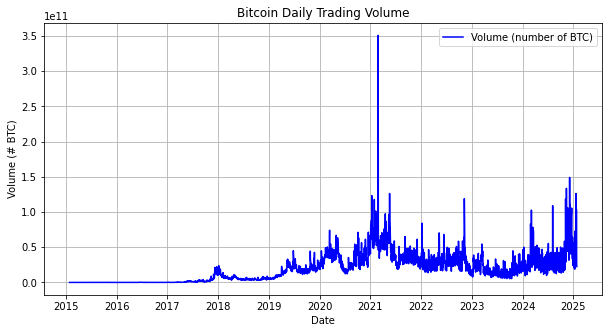

In [3]:
# Plot trading volume
plt.figure(figsize=(10, 5))
plt.plot(bitcoin_data['Volume'], label='Volume (number of BTC)', color='blue')
plt.title('Bitcoin Daily Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume (# BTC)')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
first_5_days = bitcoin_data.head(5)
print(first_5_days)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-27  273.166992  275.480011  250.653000  263.475006  263.475006   
2015-01-28  263.351013  266.535004  227.046005  233.914993  233.914993   
2015-01-29  233.348007  238.705994  220.712006  233.513000  233.513000   
2015-01-30  232.772003  242.850998  225.839005  226.425003  226.425003   
2015-01-31  226.440994  233.503998  216.309006  217.464005  217.464005   

              Volume  
Date                  
2015-01-27  44399000  
2015-01-28  44352200  
2015-01-29  32213400  
2015-01-30  26605200  
2015-01-31  23348200  


In [5]:
#Downdown Bitcoin data and save it

import yfinance as yf
import datetime

# Define the ticker symbol for Bitcoin (BTC-USD is the ticker for Bitcoin in USD)
ticker_symbol = "BTC-USD"

# Define the time period (last five years)
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=10*365)  # 5 years ago
# Get the data from Yahoo Finance
bitcoin_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1d")

#Define the file path 
filepath = "F:/tong/bitcoin_daily_data_10y.csv"   #You may change the path
bitcoin_data.to_csv(filepath)

# Save the data to a CSV file to the current directory
bitcoin_data.to_csv("bitcoin_daily_data_10y.csv")

[*********************100%***********************]  1 of 1 completed


In [6]:
# Calculate Bitcoin daily, weekly, monthly, and annual returns and save it in a file
import pandas as pd
# Load the data 
filepath = "F:/tong/bitcoin_daily_data_10y.csv" # Update this if necessary 
bitcoin_data = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date') #set Date as index

bitcoin_data['Daily Return'] = bitcoin_data['Adj Close'].pct_change()
bitcoin_data['Weekly Return'] = bitcoin_data['Close'].pct_change(periods=7)
bitcoin_data['Monthly Return'] = bitcoin_data['Close'].pct_change(periods=30)
bitcoin_data['Annual Return'] = bitcoin_data['Close'].pct_change(periods=365)

# Save the DataFrame with all returns to a new CSV file
output_file_path = 'bitcoin_returns_10y.csv'
bitcoin_data.to_csv(output_file_path)

output_file_path

'bitcoin_returns_10y.csv'

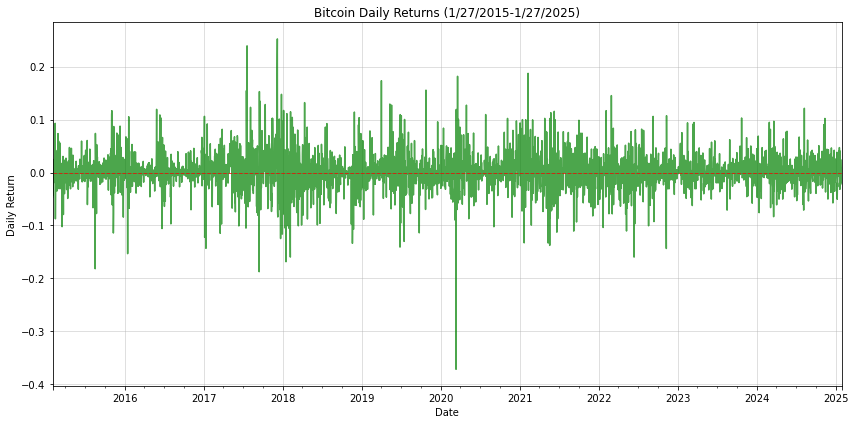

Daily returns plot saved to: bitcoin_daily_returns_from_dataset.png


In [7]:
# using data from the saved return file to get a Bitcoin daily return graph
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset containing returns
filepath = "bitcoin_returns_10y.csv"  # Update this to the path of your return dataset
return_data = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')

# Plot daily returns
plt.figure(figsize=(12, 6))
return_data['Daily Return'].plot(color='green', alpha=0.7, title='Bitcoin Daily Returns (1/27/2015-1/27/2025)')
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(alpha=0.5)
plt.tight_layout()

# Save the plot
plot_filepath = 'bitcoin_daily_returns_from_dataset.png'
plt.savefig(plot_filepath)
plt.show()

print("Daily returns plot saved to:", plot_filepath)

In [9]:
# Get key statistics of Bitcoin daily returns 
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Load the dataset containing returns
filepath = "bitcoin_returns_10y.csv"  # Update this to the path of your return dataset
return_data = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')

daily_returns = return_data['Daily Return'].dropna()

# Calculate statistics
mean_return = daily_returns.mean()
median_return = daily_returns.median()
std_dev_return = daily_returns.std()
skewness_return = skew(daily_returns)
kurtosis_return = kurtosis(daily_returns)
percentile_5 = np.percentile(daily_returns, 5)
percentile_95 = np.percentile(daily_returns, 95)

# Create a results table
stats_table = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Standard Deviation", "Skewness", "Kurtosis", "5th Percentile", "95th Percentile"],
    "Value": [
        mean_return, median_return, std_dev_return, skewness_return, kurtosis_return, percentile_5, percentile_95
    ]
})

print(stats_table)  # Display the daily return distribution table

            Statistic     Value
0                Mean  0.002308
1              Median  0.001385
2  Standard Deviation  0.035697
3            Skewness -0.085165
4            Kurtosis  7.676058
5      5th Percentile -0.054176
6     95th Percentile  0.057381


[*********************100%***********************]  1 of 1 completed


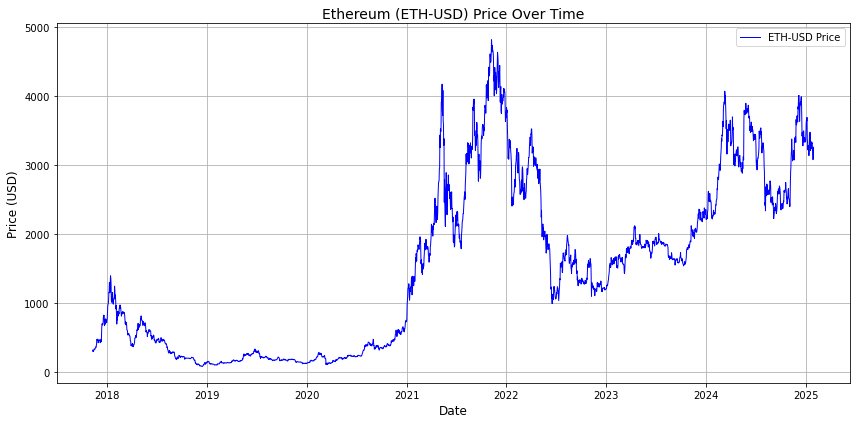

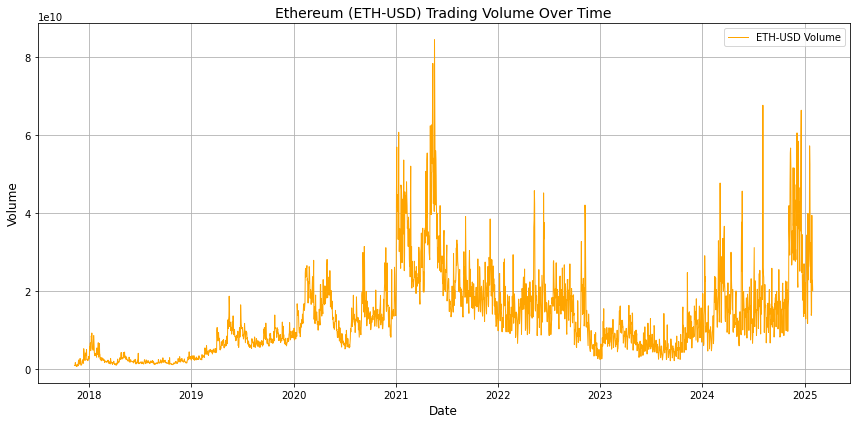

In [10]:
#Get Ethereum price and Volume from Yahoo Finance!: 1) save data to a file, 2) plot price and volume
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the ticker symbol for Ethereum
ticker_symbol = "ETH-USD"

# Download data from Yahoo Finance starting from the earliest date
eth_data = yf.download(ticker_symbol, start="2010-01-01", interval="1d")

# Save the data to a CSV file (optional)
eth_data.to_csv("eth_price_volume_data.csv")

# Extract price (Close) and volume data
eth_prices = eth_data['Close']
eth_volume = eth_data['Volume']

# Convert index to NumPy array for plotting
dates = eth_data.index.to_numpy()
prices = eth_prices.to_numpy()
volume = eth_volume.to_numpy()
# Plot the Ethereum price data
plt.figure(figsize=(12, 6))
plt.plot(dates, prices, label='ETH-USD Price', color='blue', linewidth=1)
plt.title('Ethereum (ETH-USD) Price Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the Ethereum volume data
plt.figure(figsize=(12, 6))
plt.plot(dates, volume, label='ETH-USD Volume', color='orange', linewidth=1)
plt.title('Ethereum (ETH-USD) Trading Volume Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


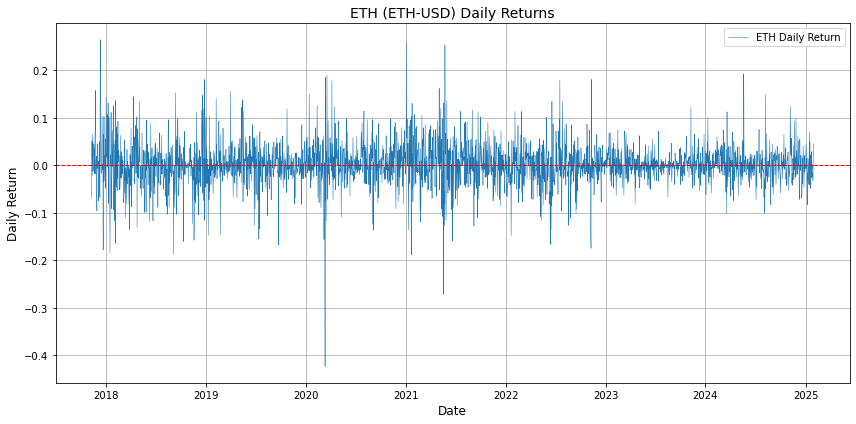

In [13]:
# Calculate ETH daily return; save to a file; plot daily return
import pandas as pd
import matplotlib.pyplot as plt

# Load XRP data from CSV
data_file = "eth_price_volume_data.csv"
eth_data = pd.read_csv(data_file, parse_dates=['Date'], index_col='Date')

# Calculate daily returns
eth_data['Daily Return'] = eth_data['Close'].pct_change()

# Save the daily return data to a new CSV file
xrp_data.to_csv("eth_daily_returns.csv")

# Convert the index and data to NumPy arrays for plotting
dates = eth_data.index.to_numpy()
daily_returns = eth_data['Daily Return'].to_numpy()

# Plot the daily returns
plt.figure(figsize=(12, 6))
plt.plot(dates, daily_returns, label='ETH Daily Return', linewidth=0.5)
plt.title('ETH (ETH-USD) Daily Returns', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Highlight zero return line
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# Get XRP data and save in a file

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the ticker symbol for XRP (Ripple)
ticker_symbol = "XRP-USD"

# Download data from Yahoo Finance starting from the earliest date
xrp_data = yf.download(ticker_symbol, start="2010-01-01", interval="1d")

# Save the data to a CSV file (optional)
xrp_data.to_csv("xrp_price_volume_data.csv")

[*********************100%***********************]  1 of 1 completed


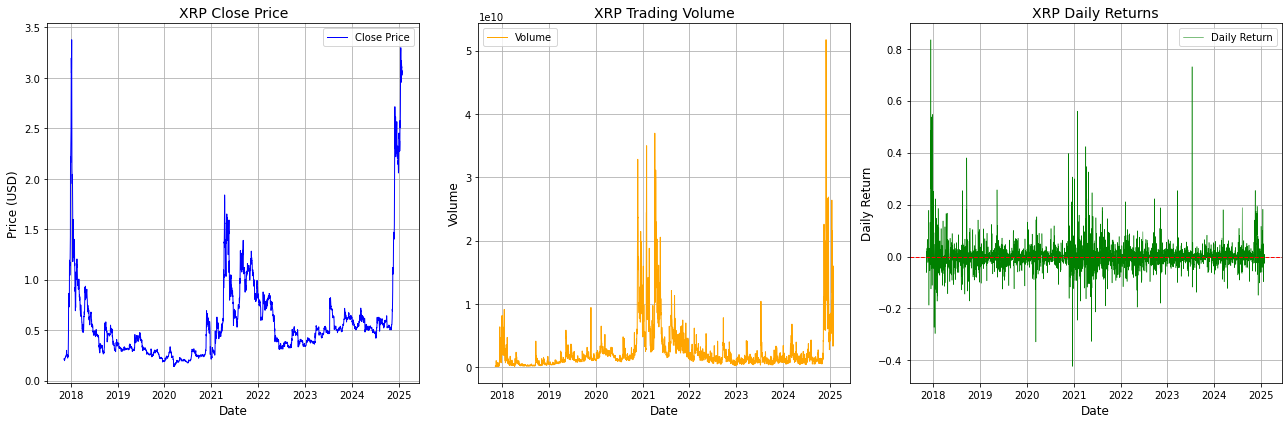

In [17]:
# read price data from the saved file; estimate XRP daily returns; plot price, volume and returns
import pandas as pd
import matplotlib.pyplot as plt

# Load XRP data from CSV
data_file = "xrp_price_volume_data.csv"
xrp_data = pd.read_csv(data_file, parse_dates=['Date'], index_col='Date')

# Calculate daily returns
xrp_data['Daily Return'] = xrp_data['Close'].pct_change()

# Save the daily return data to a new CSV file
xrp_data.to_csv("xrp_daily_returns.csv")

# Convert data to NumPy arrays to avoid indexing issues
dates = xrp_data.index.to_numpy()
close_prices = xrp_data['Close'].to_numpy()
volumes = xrp_data['Volume'].to_numpy()
daily_returns = xrp_data['Daily Return'].to_numpy()

# Create a 1×3 panel for Close, Volume, and Daily Returns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Close price
axes[0].plot(dates, close_prices, label='Close Price', color='blue', linewidth=1)
axes[0].set_title('XRP Close Price', fontsize=14)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Price (USD)', fontsize=12)
axes[0].grid(True)
axes[0].legend()

# Plot Volume
axes[1].plot(dates, volumes, label='Volume', color='orange', linewidth=1)
axes[1].set_title('XRP Trading Volume', fontsize=14)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Volume', fontsize=12)
axes[1].grid(True)
axes[1].legend()

# Plot Daily Returns
axes[2].plot(dates, daily_returns, label='Daily Return', color='green', linewidth=0.5)
axes[2].set_title('XRP Daily Returns', fontsize=14)
axes[2].set_xlabel('Date', fontsize=12)
axes[2].set_ylabel('Daily Return', fontsize=12)
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)  # Zero return line
axes[2].grid(True)
axes[2].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [18]:
# Down price/volume data for S&P500 from Yahoo Finance; save in a file
import yfinance as yf
import pandas as pd

# Define the ticker symbol for S&P 500 index
ticker_symbol = "^GSPC"

# Define the date range
start_date = "2015-01-27"
end_date = "2025-01-27"

# Download data from Yahoo Finance
sp500_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1d")

# Calculate daily returns
sp500_data['Daily Return'] = sp500_data['Adj Close'].pct_change()

# Save the data to a CSV file
output_file = "sp500_return_data.csv"
sp500_data.to_csv(output_file)

print(f"Data saved to {output_file}")

[*********************100%***********************]  1 of 1 completed
Data saved to sp500_return_data.csv


In [20]:
# Read daily returns of different assets and combine them; compare daily returns
import pandas as pd

# Load datasets
btc_data = pd.read_csv("bitcoin_returns_10y.csv", parse_dates=['Date'], index_col='Date')
eth_data = pd.read_csv("eth_daily_returns.csv", parse_dates=['Date'], index_col='Date')
xrp_data = pd.read_csv("xrp_daily_returns.csv", parse_dates=['Date'], index_col='Date')
sp500_data = pd.read_csv("sp500_return_data.csv", parse_dates=['Date'], index_col='Date')

# Retain only "Daily Return" columns and rename
btc_data = btc_data[['Daily Return']].rename(columns={'Daily Return': 'BTC'})
eth_data = eth_data[['Daily Return']].rename(columns={'Daily Return': 'ETH'})
xrp_data = xrp_data[['Daily Return']].rename(columns={'Daily Return': 'XRP'})
sp500_data = sp500_data[['Daily Return']].rename(columns={'Daily Return': 'SP500'})

# Concatenate datasets (Align with S&P 500 trading calendar)
combined_data = pd.concat([sp500_data, btc_data, eth_data, xrp_data], axis=1)

# Add a 'Year' column for grouping
combined_data['Year'] = combined_data.index.year

# Compute yearly average returns for each security
yearly_avg_returns = combined_data.groupby('Year').mean()

# Compute overall average returns for all years
all_years_avg = combined_data.mean().to_frame(name='All Years').T

# Concatenate overall average with yearly averages
final_avg_returns = pd.concat([yearly_avg_returns, all_years_avg])

# Save results to CSV
output_file = "average_returns_summary1.csv"
final_avg_returns.to_csv(output_file)

print(f"Average returns summary saved to {output_file}.")

Average returns summary saved to average_returns_summary1.csv.


In [24]:
# estimate standard deviations of different cryptos
import pandas as pd
import numpy as np

# Load datasets
btc_data = pd.read_csv("bitcoin_returns_10y.csv", parse_dates=['Date'], index_col='Date')
eth_data = pd.read_csv("eth_daily_returns.csv", parse_dates=['Date'], index_col='Date')
xrp_data = pd.read_csv("xrp_daily_returns.csv", parse_dates=['Date'], index_col='Date')
sp500_data = pd.read_csv("sp500_return_data.csv", parse_dates=['Date'], index_col='Date')

# Retain only "Daily Return" columns and rename
btc_data = btc_data[['Daily Return']].rename(columns={'Daily Return': 'BTC Return'})
eth_data = eth_data[['Daily Return']].rename(columns={'Daily Return': 'ETH Return'})
xrp_data = xrp_data[['Daily Return']].rename(columns={'Daily Return': 'XRP Return'})
sp500_data = sp500_data[['Daily Return']].rename(columns={'Daily Return': 'SP500 Return'})

combined_data = pd.concat([sp500_data, btc_data, eth_data, xrp_data], axis=1, join='outer')

# Add a 'Year' column for grouping
combined_data['Year'] = combined_data.index.year

# **Exclude 2025 data**
combined_data = combined_data[combined_data['Year'] < 2025]

# Function to compute standard deviation
def calculate_standard_deviation(group):
    return group.iloc[:, :-1].std()

# Compute standard deviations **for each year** per security (excluding 2025)
yearly_std_devs = combined_data.groupby('Year').apply(calculate_standard_deviation)

# Compute standard deviations **for all years combined (excluding 2025)**
all_years_std_dev = calculate_standard_deviation(combined_data).rename('All Years')

# Append overall standard deviations to yearly standard deviations
final_std_devs = pd.concat([yearly_std_devs, all_years_std_dev.to_frame().T])

# Save results to CSV
output_file = "yearly_standard_deviations1.csv"
final_std_devs.to_csv(output_file)

In [25]:
# Sharpe Ratios of different cryptos and SP500
import pandas as pd
import numpy as np

# Load datasets
btc_data = pd.read_csv("bitcoin_returns_10y.csv", parse_dates=['Date'], index_col='Date')
eth_data = pd.read_csv("eth_daily_returns.csv", parse_dates=['Date'], index_col='Date')
xrp_data = pd.read_csv("xrp_daily_returns.csv", parse_dates=['Date'], index_col='Date')
sp500_data = pd.read_csv("sp500_return_data.csv", parse_dates=['Date'], index_col='Date')

# Retain only "Daily Return" columns and rename
btc_data = btc_data[['Daily Return']].rename(columns={'Daily Return': 'BTC Return'})
eth_data = eth_data[['Daily Return']].rename(columns={'Daily Return': 'ETH Return'})
xrp_data = xrp_data[['Daily Return']].rename(columns={'Daily Return': 'XRP Return'})
sp500_data = sp500_data[['Daily Return']].rename(columns={'Daily Return': 'SP500 Return'})

# Merge datasets (Align with S&P 500 trading calendar)
combined_data = pd.concat([sp500_data, btc_data, eth_data, xrp_data], axis=1, join='outer')

# Ensure all securities are aligned with S&P 500 trading days
combined_data = combined_data[combined_data.index.isin(sp500_data.index)]

# Add a 'Year' column for grouping
combined_data['Year'] = combined_data.index.year

# Define risk-free rate (daily, assuming 2% annualized risk-free rate)
risk_free_rate_daily = 0.02 / 252

# Function to compute Sharpe ratio with zero-volatility handling
def calculate_sharpe(group, risk_free_rate):

    mean_return = group.mean()
    std_dev = group.std()

    # Avoid division by zero by returning NaN when std_dev = 0
    if std_dev.equals(0):
        return np.nan

    sharpe_ratio = (mean_return - risk_free_rate) / std_dev
    return sharpe_ratio

# Compute Sharpe ratios **for each year** per security
yearly_sharpe_ratios = combined_data.groupby('Year').apply(lambda group: calculate_sharpe(group.iloc[:, :-1], risk_free_rate_daily))

# Compute Sharpe ratios **for all years combined**
all_years_sharpe = calculate_sharpe(combined_data.iloc[:, :-1], risk_free_rate_daily).rename('All Years')

# Append overall Sharpe ratios to yearly Sharpe ratios
final_sharpe_ratios = pd.concat([yearly_sharpe_ratios, all_years_sharpe.to_frame().T])

# Save results
output_file = "yearly_sharpe_ratios.csv"
final_sharpe_ratios.to_csv(output_file)

print(f"Yearly and all-time Sharpe ratios saved to {output_file}.")

Yearly and all-time Sharpe ratios saved to yearly_sharpe_ratios.csv.
